# Visual Analysis of Document Similarity

#### About the Dataset: Hobbies Corpus 

Baleen corpus contains 448 files in 5 categories. Structured as:

- 7,420 paragraphs (16.562 mean paragraphs per file)
- 14,251 sentences (1.921 mean sentences per paragraph).

Word count of 288,520 with a vocabulary of 23,738 (12.154 lexical diversity).
Corpus scan took 14 seconds.

#### Category Breakdown 

The categories in this corpus have the following properties:

#### Documents and File Size 

- books: 72 docs (4.1MiB)
- cinema: 100 docs (9.2MiB)
- cooking: 30 docs (3.0MiB)
- gaming: 128 docs (8.8MiB)
- sports: 118 docs (15.9MiB)

#### Document Structure 

- books: 844 paragraphs and 2,030 sentences
- cinema: 1,475 paragraphs and 3,047 sentences
- cooking: 1,190 paragraphs and 2,425 sentences
- gaming: 1,802 paragraphs and 3,373 sentences
- sports: 2,109 paragraphs and 3,376 sentences

#### Words and Vocabulary

- books: 41,851 words with a vocabulary size of 7,838
- cinema: 69,153 words with a vocabulary size of 10,274
- cooking: 37,854 words with a vocabulary size of 5,038
- gaming: 70,778 words with a vocabulary size of 9,120
- sports: 68,884 words with a vocabulary size of 8,028


### Load Data

In [9]:
from textDB import load_data
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger

matplotlib_axes_logger.setLevel('ERROR')
warnings.filterwarnings('ignore')

In [2]:
corpus = load_data('hobbies')

### Vectorize the Documents

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
docs       = vectorizer.fit_transform(corpus.data)
labels     = corpus.target

### t-SNE: Clustering Similar Documents with Squared Euclidean Distance And Euclidean Distance

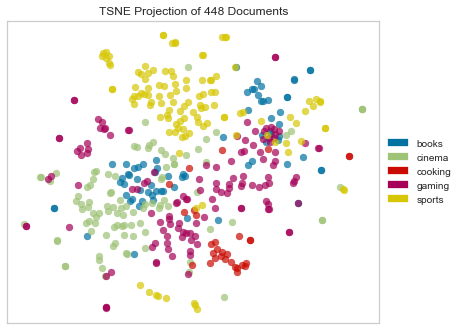

In [10]:
from yellowbrick.text import TSNEVisualizer

tsne = TSNEVisualizer(size=(600,400))
tsne.fit(docs, labels)
tsne.poof();

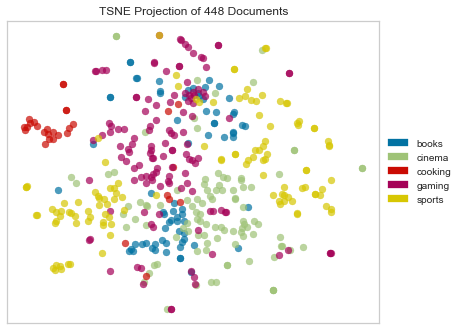

In [11]:
tsne = TSNEVisualizer(metric="euclidean", size=(600,400))
tsne.fit(docs, labels)
tsne.poof();

## Distance Metrics for Non-Numerical Inputs</h3>

In [12]:
# Examples of distance metrics
distance_functions = [
"braycurtis", "canberra", "chebyshev", "cityblock", "correlation", "cosine",
"dice", "euclidean", "hamming", "jaccard", "kulsinski", "mahalanobis",
"matching", "minkowski", "rogerstanimoto", "russellrao", "seuclidean",
"sokalmichener", "sokalsneath", "sqeuclidean", "yule"
]

### Manhattan (aka “Taxicab” or “City Block”) Distance

![Alt-text](https://upload.wikimedia.org/wikipedia/commons/0/08/Manhattan_distance.svg "By User:Psychonaut - Created by User:Psychonaut with XFig, Public Domain, https://commons.wikimedia.org/w/index.php?curid=731390")

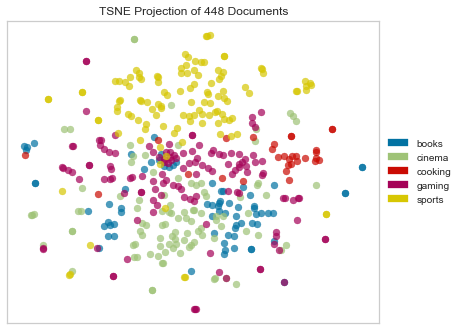

In [14]:
tsne = TSNEVisualizer(metric="cityblock", size=(600,400))
tsne.fit(docs, labels)
tsne.poof();

### Task 5: Bray Curtis Dissimilarity and Canberra Distance

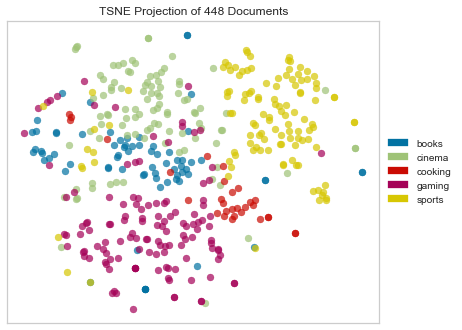

In [15]:
tsne = TSNEVisualizer(metric="braycurtis", size=(600,400))
tsne.fit(docs, labels)
tsne.poof();

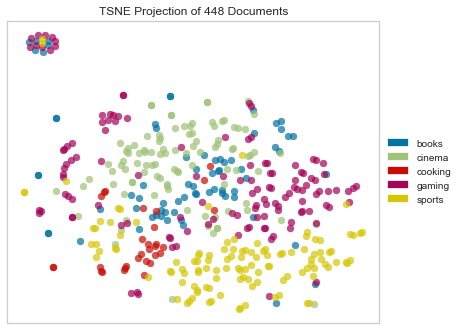

In [16]:
tsne = TSNEVisualizer(metric="canberra", size=(600,400))
tsne.fit(docs, labels)
tsne.poof();

### Cosine Distance

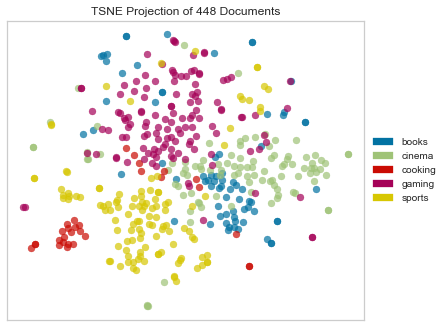

In [17]:
tsne = TSNEVisualizer(metric="cosine")
tsne.fit(docs, labels)
tsne.poof();

### Other Metrics

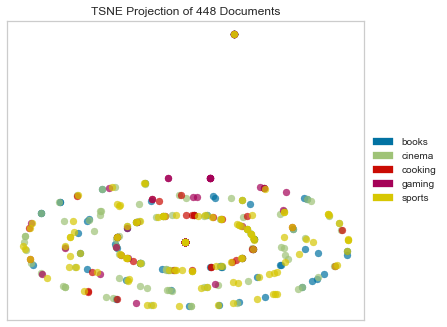

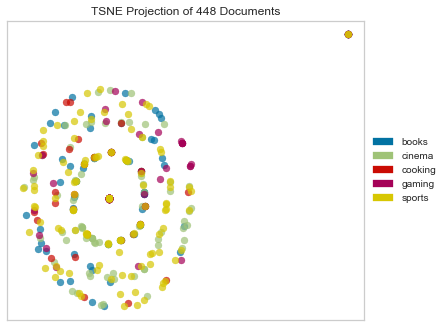

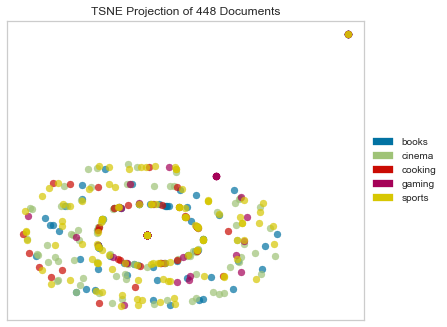

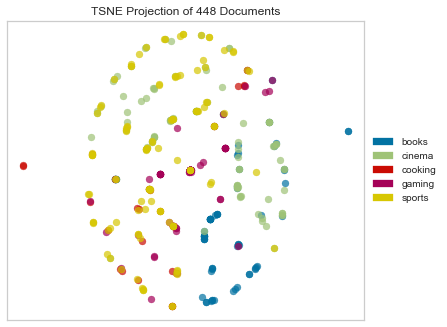

In [18]:
distance_functions = [
    "jaccard", "sokalmichener", "rogerstanimoto", "hamming"
]

for metric in distance_functions:
    tsne = TSNEVisualizer(metric=metric)
    tsne.fit(docs, labels)
    tsne.poof()

### Using KMeans Clustering

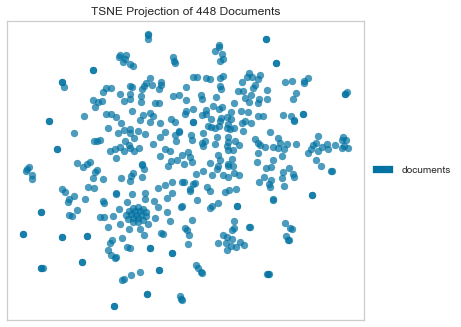

In [19]:
tsne = TSNEVisualizer(labels=["documents"])
tsne.fit(docs)
tsne.poof();

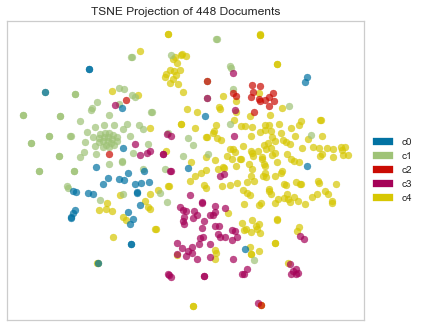

In [20]:
# Apply clustering instead of class names.
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5)
clusters.fit(docs)

tsne = TSNEVisualizer()
tsne.fit(docs, ["c{}".format(c) for c in clusters.labels_])
tsne.poof();